<a href="https://colab.research.google.com/github/ibrahimabdulj/Plant-Disease-Detection-System/blob/main/plantdesiesdetection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

#Instead of downloading the dataset locally and open it on my system i'll download and provide the path from kaggle
  

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)
print("Contents of the dataset root directory:", os.listdir(path))
print("Contents of 'new plant diseases dataset(augmented)':", os.listdir(os.path.join(path, 'new plant diseases dataset(augmented)')))

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset
Contents of the dataset root directory: ['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
Contents of 'new plant diseases dataset(augmented)': ['New Plant Diseases Dataset(Augmented)']


##Data Preprocessing


###Training preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, 'new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'train'),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


###Validation Image Preprocessing

In [5]:
Validation_set = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, 'new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'valid'),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[ 76.5   73.5   66.5 ]
   [ 81.    78.    71.  ]
   [ 91.5   88.5   81.5 ]
   ...
   [107.25 106.25 102.25]
   [111.   110.   106.  ]
   [113.5  112.5  108.5 ]]

  [[ 75.5   72.5   65.5 ]
   [ 75.5   72.5   65.5 ]
   [ 82.5   79.5   72.5 ]
   ...
   [105.75 104.75 100.75]
   [108.5  107.5  103.5 ]
   [109.75 108.75 104.75]]

  [[ 79.75  76.75  69.75]
   [ 78.75  75.75  68.75]
   [ 76.5   73.5   66.5 ]
   ...
   [105.75 104.75 100.75]
   [106.75 105.75 101.75]
   [107.25 106.25 102.25]]

  ...

  [[116.   117.   111.  ]
   [116.25 117.25 111.25]
   [118.   119.   113.  ]
   ...
   [161.5  168.5  161.5 ]
   [161.5  168.5  161.5 ]
   [160.75 167.75 160.75]]

  [[117.75 118.75 112.75]
   [117.75 118.75 112.75]
   [118.25 119.25 113.25]
   ...
   [161.5  168.5  161.5 ]
   [161.5  168.5  161.5 ]
   [162.25 169.25 162.25]]

  [[119.25 120.25 114.25]
   [121.75 122.75 116.75]
   [121.5  122.5  116.5 ]
   ...
   [161.5  168.5  161.5 ]
   [161.5  168.5  161.5 ]
   [163.5  170.5  16

##To avoid Overshooting
1. Choose small learning rate default 0.001 changed to 0.0001
2. They maybe be chnace of Underfitting, so increase number of Neurons
3. Add more Convolution layers to extract more features from thr images its possibly that model unable to capture relevants features or model is confusing due to lack features so feed with more features

##Building Model Architecture

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [9]:
model = Sequential()


Building Convolution layer using MAxPooling Operation

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) # To avoid Overfitting

Flattening Operation

In [16]:
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))


###OutPut Layer

In [17]:
model.add(Dense(units=38,activation='softmax'))

In [38]:
model.add(Dropout(0.4))

Compilling Model


In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0003),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

##Model Training

In [39]:
training_history = model.fit(x=training_set,epochs=10,validation_data=Validation_set)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 66ms/step - accuracy: 0.0278 - loss: 8.2806 - val_accuracy: 0.0286 - val_loss: 3.6364
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.0269 - loss: 8.3304 - val_accuracy: 0.0286 - val_loss: 3.6362
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.0270 - loss: 8.3354 - val_accuracy: 0.0286 - val_loss: 3.6361
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 63ms/step - accuracy: 0.0279 - loss: 8.2902 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.0290 - loss: 8.2962 - val_accuracy: 0.0287 - val_loss: 3.6360
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.0280 - loss: 8.3924 - val_accuracy: 0.0286 - val_loss: 3.6360
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.0280 - loss: 8.3074 - val_accuracy: 0.0286 - val_loss: 3.6360
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 

##Model Evaluation
###Model Evaluation on Training Set

In [40]:
train_loss,train_accuracy = model.evaluate(training_set)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.0288 - loss: 3.6359


In [41]:
print(train_loss, train_accuracy)

3.636056423187256 0.02859378419816494


the model achieved a training accuracy of 66.6% with a low loss of 1.0, indicating effective learning without overfitting , as performance on validation data remained comparable

In [42]:
val_loss,val_accuracy = model.evaluate(Validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.0284 - loss: 3.6365


In [43]:
print(val_loss, val_accuracy)

3.6360549926757812 0.028625085949897766


##Saving Model
###for the purpose of reuse later in the future without having to run the model all over again

In [44]:
model.save('trained_model.keras')

In [45]:
training_history.history

{'accuracy': [0.028380397707223892,
  0.027953624725341797,
  0.028124332427978516,
  0.02839462272822857,
  0.028038978576660156,
  0.02793939784169197,
  0.028693363070487976,
  0.028650686144828796,
  0.029888328164815903,
  0.028238140046596527],
 'loss': [8.277617454528809,
  8.32668399810791,
  8.327841758728027,
  8.323395729064941,
  8.303155899047852,
  8.367603302001953,
  8.315176963806152,
  8.310718536376953,
  8.337236404418945,
  8.33200740814209],
 'val_accuracy': [0.028568176552653313,
  0.028568176552653313,
  0.028568176552653313,
  0.028738902881741524,
  0.028738902881741524,
  0.028568176552653313,
  0.028568176552653313,
  0.028568176552653313,
  0.028568176552653313,
  0.028625085949897766],
 'val_loss': [3.636387586593628,
  3.6361520290374756,
  3.636066436767578,
  3.636042356491089,
  3.6360435485839844,
  3.6360275745391846,
  3.6360411643981934,
  3.6360256671905518,
  3.6360464096069336,
  3.6360533237457275]}

Recording Model History


In [46]:
import json
with open("training_hist.json", "w") as f:
  json.dump(training_history.history, f)

In [47]:
training_history.history['val_accuracy']

[0.028568176552653313,
 0.028568176552653313,
 0.028568176552653313,
 0.028738902881741524,
 0.028738902881741524,
 0.028568176552653313,
 0.028568176552653313,
 0.028568176552653313,
 0.028568176552653313,
 0.028625085949897766]

Accuracy Visualization

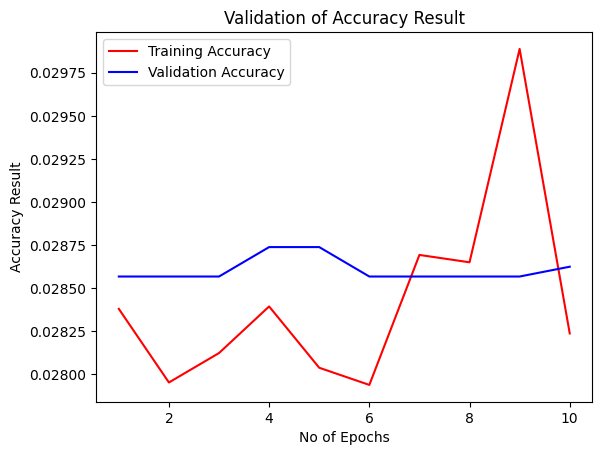

In [50]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label ='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label ='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Validation of Accuracy Result")
plt.legend()
plt.show()


Some other Metric for model Evaluation

In [51]:
class_name = Validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [52]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, 'new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'train'),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [53]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 32ms/step


(array([[0.02889262, 0.02826681, 0.02517136, ..., 0.02786906, 0.02538558,
         0.02743142],
        [0.02889262, 0.02826681, 0.02517136, ..., 0.02786906, 0.02538558,
         0.02743142],
        [0.02889262, 0.02826681, 0.02517136, ..., 0.02786906, 0.02538558,
         0.02743142],
        ...,
        [0.02889262, 0.02826681, 0.02517136, ..., 0.02786906, 0.02538558,
         0.02743142],
        [0.02889262, 0.02826681, 0.02517136, ..., 0.02786906, 0.02538558,
         0.02743142],
        [0.02889262, 0.02826681, 0.02517136, ..., 0.02786906, 0.02538558,
         0.02743142]], dtype=float32),
 (70295, 38))

In [54]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([15, 15, 15, ..., 15, 15, 15])>

In [57]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(70295, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [58]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true


<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

Calculate Precision Recall
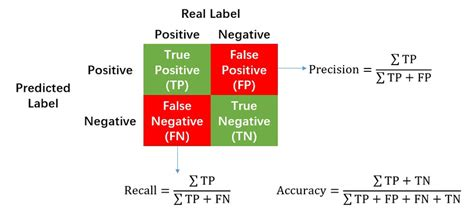

In [59]:
from sklearn.metrics import classification_report


In [60]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00      2016
                                 Apple___Black_rot       0.00      0.00      0.00      1987
                          Apple___Cedar_apple_rust       0.00      0.00      0.00      1760
                                   Apple___healthy       0.00      0.00      0.00      2008
                               Blueberry___healthy       0.00      0.00      0.00      1816
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00      1683
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00      1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00      1642
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00      1907
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
